## California Houses Price Prediction

This project focuses on predicting housing prices in California using machine learning techniques. The dataset used for this project is the California Housing Data, which can be found [here](https://www.kaggle.com/datasets/dhirajnirne/california-housing-data).

In [1]:
import numpy as nd
import pandas as pd
#pd.set_option("display.max_rows", None)

DF_Given = pd.read_excel("1553768847_housing.xlsx")
DF_Given

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [2]:
DF_Given.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [3]:
#Reindexing the columns in a proper order for better view
DF2 = DF_Given.reindex(['housing_median_age', 'median_income','total_rooms','total_bedrooms','households', 'population', 'median_house_value', 'ocean_proximity', 'latitude', 'longitude'], axis=1)
DF2

,housing_median_age,median_income,total_rooms,total_bedrooms,households,population,median_house_value,ocean_proximity,latitude,longitude
0,41,8.3252,880,129.0,126,322,452600,NEAR BAY,37.88,-122.23
1,21,8.3014,7099,1106.0,1138,2401,358500,NEAR BAY,37.86,-122.22
2,52,7.2574,1467,190.0,177,496,352100,NEAR BAY,37.85,-122.24
3,52,5.6431,1274,235.0,219,558,341300,NEAR BAY,37.85,-122.25
4,52,3.8462,1627,280.0,259,565,342200,NEAR BAY,37.85,-122.25
...,...,...,...,...,...,...,...,...,...,...
20635,25,1.5603,1665,374.0,330,845,78100,INLAND,39.48,-121.09
20636,18,2.5568,697,150.0,114,356,77100,INLAND,39.49,-121.21
20637,17,1.7000,2254,485.0,433,1007,92300,INLAND,39.43,-121.22
20638,18,1.8672,1860,409.0,349,741,84700,INLAND,39.43,-121.32


In [4]:
#Sorting the data or reordering in the ascending order of age and median income
DF3 = DF2.sort_values(by=["housing_median_age", "median_income"]).reset_index().drop('index',axis=1)
DF3

,housing_median_age,median_income,total_rooms,total_bedrooms,households,population,median_house_value,ocean_proximity,latitude,longitude
0,1,1.6250,6,2.0,2,8,55000,INLAND,33.86,-116.95
1,1,4.2500,2254,328.0,112,402,189200,INLAND,37.65,-120.93
2,1,4.8750,83,15.0,15,32,141700,INLAND,35.08,-117.95
3,1,5.2636,2062,343.0,268,872,191300,INLAND,38.23,-122.00
4,2,1.9667,966,270.0,169,233,450000,<1H OCEAN,34.42,-118.56
...,...,...,...,...,...,...,...,...,...,...
20635,52,15.0001,1202,142.0,138,408,500001,<1H OCEAN,34.07,-118.41
20636,52,15.0001,3000,374.0,375,1143,500001,<1H OCEAN,34.04,-118.50
20637,52,15.0001,1447,186.0,181,483,500001,NEAR BAY,37.79,-122.44
20638,52,15.0001,8,1.0,1,13,500001,NEAR BAY,37.79,-122.50


In [5]:
DF3.describe(percentiles = [0.25, 0.5, 0.75, 0.9], include = "all")

,housing_median_age,median_income,total_rooms,total_bedrooms,households,population,median_house_value,ocean_proximity,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN,NaN
mean,28.639486,3.870671,2635.763081,537.870553,499.539680,1425.476744,206855.816909,NaN,35.631861,-119.569704
std,12.585558,1.899822,2181.615252,421.385070,382.329753,1132.462122,115395.615874,NaN,2.135952,2.003532
min,1.000000,0.499900,2.000000,1.000000,1.000000,3.000000,14999.000000,NaN,32.540000,-124.350000
25%,18.000000,2.563400,1447.750000,296.000000,280.000000,787.000000,119600.000000,NaN,33.930000,-121.800000
50%,29.000000,3.534800,2127.000000,435.000000,409.000000,1166.000000,179700.000000,NaN,34.260000,-118.490000
75%,37.000000,4.743250,3148.000000,647.000000,605.000000,1725.000000,264725.000000,NaN,37.710000,-118.010000


Observations from above:

- 90% of the districts have age below 46 and median income below 6.15 (X10000$)

- Ocean proximity has 5 unique value with '<1H OCEAN' the most frequent one  (frequency = 9136)


In [6]:
#Lets check total Nan in the dataframe
DF3.isna().sum()

housing_median_age      0
median_income           0
total_rooms             0
total_bedrooms        207
households              0
population              0
median_house_value      0
ocean_proximity         0
latitude                0
longitude               0
dtype: int64

In [6]:
#Lets check total Nan in the dataframe
DF3.isna().sum()

housing_median_age      0
median_income           0
total_rooms             0
total_bedrooms        207
households              0
population              0
median_house_value      0
ocean_proximity         0
latitude                0
longitude               0
dtype: int64

In [6]:
#Lets check total Nan in the dataframe
DF3.isna().sum()

housing_median_age      0
median_income           0
total_rooms             0
total_bedrooms        207
households              0
population              0
median_house_value      0
ocean_proximity         0
latitude                0
longitude               0
dtype: int64

Total NaN in column 'total_bedrooms' are 207 and this needs to be fixed

In [7]:
#calc median and replace nullvals with it
median = DF3["total_bedrooms"].median() 
DF3["total_bedrooms"].fillna(median, inplace = True)
#Lets check again total Nan in the dataframe
DF3.isna().sum()

housing_median_age    0
median_income         0
total_rooms           0
total_bedrooms        0
households            0
population            0
median_house_value    0
ocean_proximity       0
latitude              0
longitude             0
dtype: int64

# Visualizing the data for insights

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

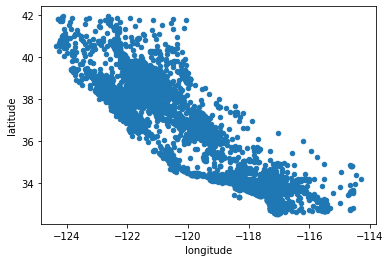

In [8]:
#Lets put a scatter plot with the help of provided geographical coordinates i.e. lattitude and longitude
DF3.plot(kind = "scatter", x = "longitude", y = "latitude")

Above scatter plot clearly resembles a cloud overview of the California State

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

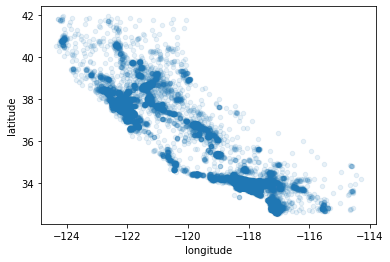

In [9]:
#Lets bring the transparency factor into the above figure to view the areas of denser population
DF3.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

Observations from above plot:
- The plot clearly shows the denser region of the populations clearly along the left border which (from google maps) happens to be the ocean's coast. 
- This characteristic is seen to be more pronounced when reducing the transparency parameter even further more (below plot).

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

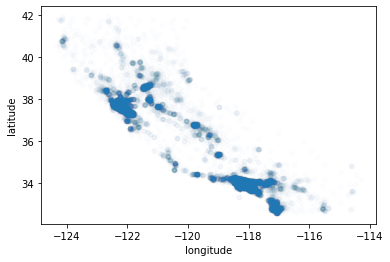

In [10]:
DF3.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.01)

Observation: 

- Compairing the above two plots, it can be concluded that majority of the population happens to be along the ocean's coast which is followed by the middle part (Inland)  of the California state
- The above fact can also be proved with the help of the value_counts on the column 'Ocean's proximity' shown below

In [11]:
DF3['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- It is clear that the there are only 5 rows with values of 'ISLAND' in the ocean_proximity column and with this small percentage it is very difficult to predict the effect of 'ISLAND' (in the ocean_proximity) on the housing_median_value 
- And so we can declare this ISLAND value in oceans_proximity as a outlier  and can drop all the these rows 

In [12]:
index_ISLAND = DF3[(DF3['ocean_proximity'] == 'ISLAND')].index
DF3.drop(index_ISLAND , inplace=True)
DF3['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

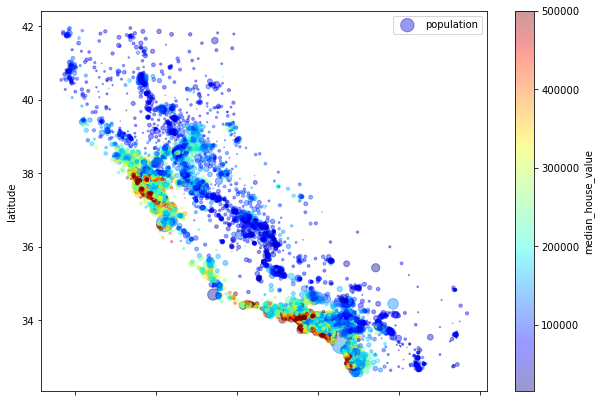

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

DF3.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
             #option s makes size of each circle represent the districts population size
             s = DF3["population"]/100, label = "population", figsize = (10,7),
             #option c makes the colors represent the prices
             #for this we use predefinded colormap "jet" raning from low (blue) to high prices(red)
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True
)

plt.legend()

Observations from above plot:

- The red and yellow spots show that mostly (around 70%) close to the ocean's cost (i.e. <1H OCEAN), median housing value tend to be higher and these groups are of small size thereby showing that these high-median house value group are relatively lower in size

- There are very few cities closer to the Ocean's coast (i.e. <1H OCEAN) where the median-housing-value is low and population is high (as shown by big circles and light-blue color) 

- As you move away from the Ocean's coast towards inland, the median hosuing value tends to drop and there are very few cities (around 10-15%) in inland where the median-housing value is moderately high

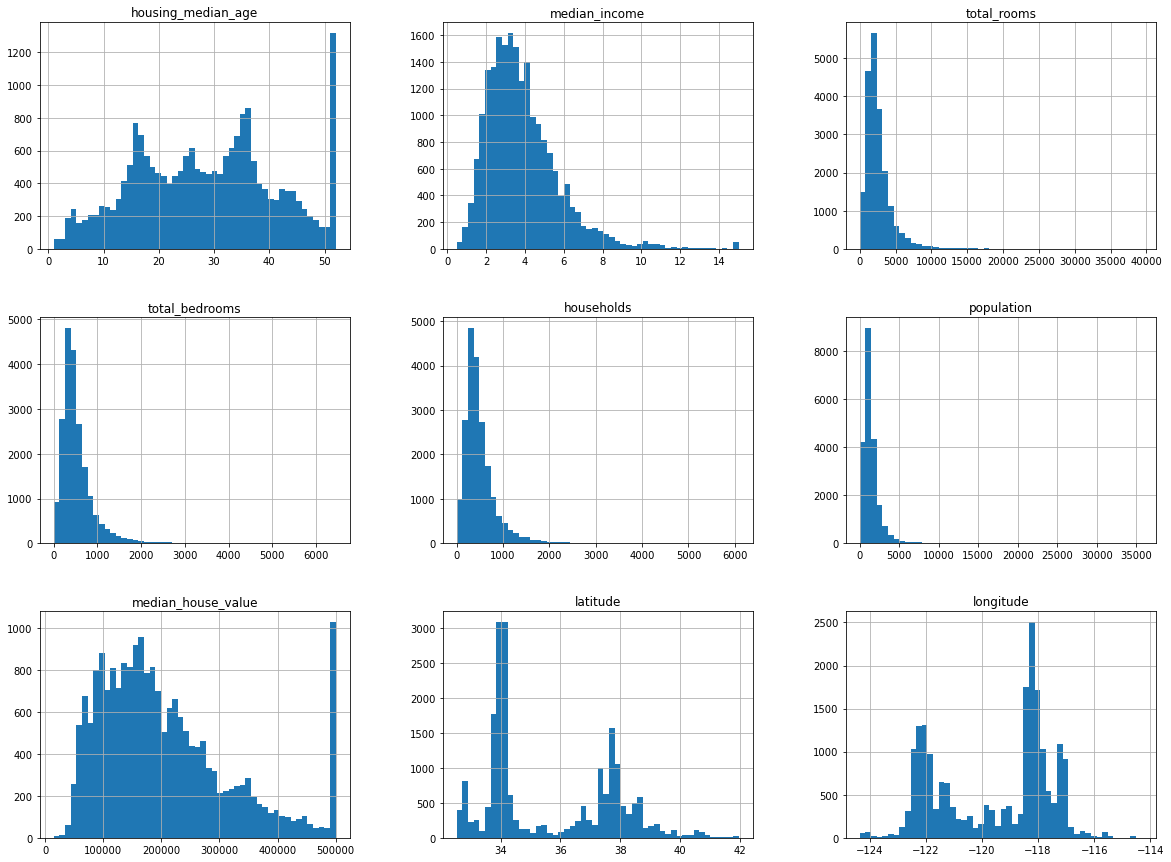

In [14]:
%matplotlib inline 
##uses jupyters own backend for inline plotting
import matplotlib.pyplot as plt
DF3.hist(bins=50, figsize=(20,15))
plt.show() 

In [15]:
DF3["median_income"].value_counts(bins=10)

(1.95, 3.4]      7431
(3.4, 4.85]      6098
(4.85, 6.3]      2990
(0.484, 1.95]    2247
(6.3, 7.75]      1061
(7.75, 9.2]       427
(9.2, 10.65]      178
(10.65, 12.1]      93
(13.55, 15.0]      63
(12.1, 13.55]      47
Name: median_income, dtype: int64

So it is clear as districts having the median income above 6 (X 10000 dollars) are quite lesser than than that having median-income less than 6 (X 10000 dollars)

In [16]:
#Lets view the above table in terms of percentage districts
DF3["median_income"].value_counts(bins=10)/ len(DF3)*100

(1.95, 3.4]      36.011631
(3.4, 4.85]      29.551732
(4.85, 6.3]      14.489944
(0.484, 1.95]    10.889266
(6.3, 7.75]       5.141749
(7.75, 9.2]       2.069300
(9.2, 10.65]      0.862612
(10.65, 12.1]     0.450691
(13.55, 15.0]     0.305307
(12.1, 13.55]     0.227768
Name: median_income, dtype: float64

- So about 91% of the districts have the median income below 6(X 10000 dollars) while remaining 9% districts have medium income above 6(X 10000 dollars)

- Percentage of districts having median income above 9.2 (X 10000 dollars) is 1.85% which is very low

- Percentage of districts having median income above 7.75 (X 10000 dollars) is 3.91%

# Looking for Correlations

<Figure size 432x288 with 0 Axes>

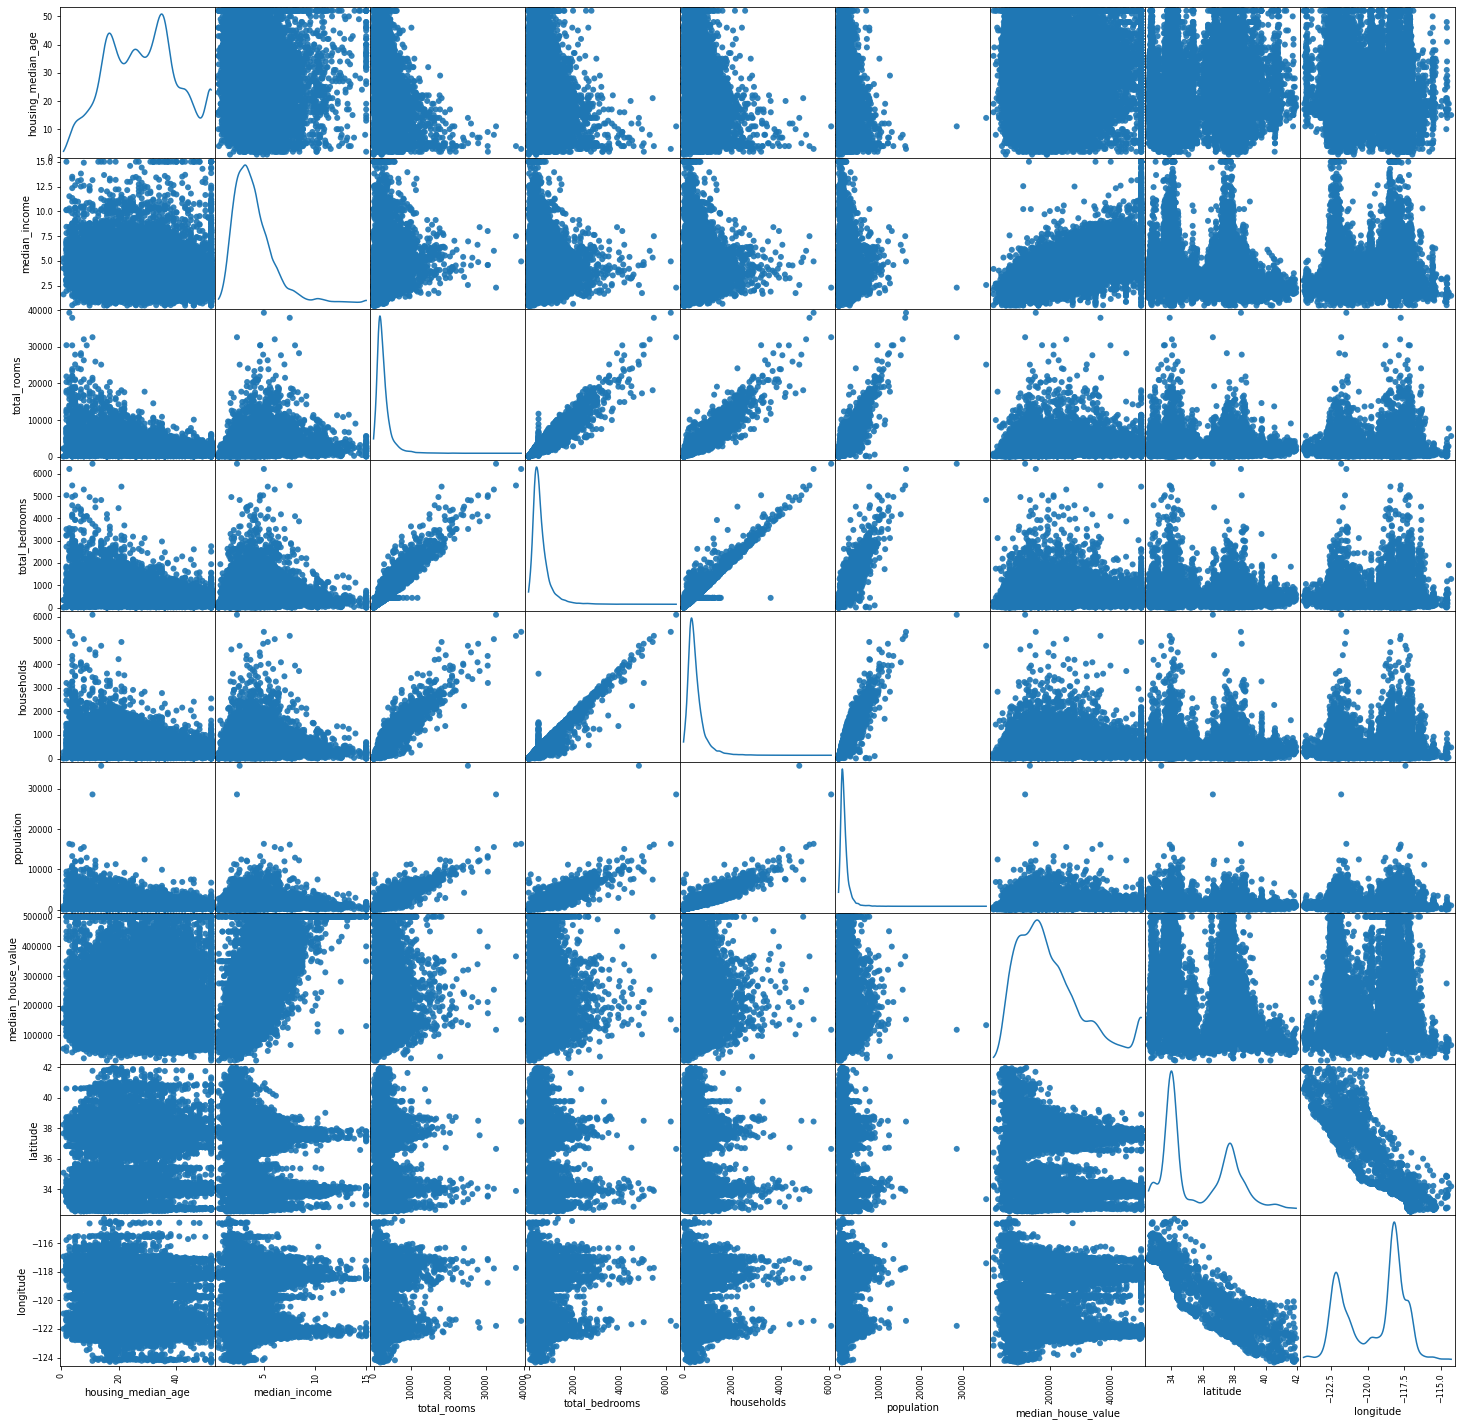

In [17]:
#display scatter_matrix also
from pandas.plotting import scatter_matrix
fig = plt.figure()
scatter_matrix(DF3,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

Using the corr() method to look for correlations (standard correlation coefficient, "Pearson's r"):

In [18]:
#Lets add the color gradient to check the parameters with higher correlation
corr_matrix = DF3.corr()
corr_matrix.style.background_gradient()

,housing_median_age,median_income,total_rooms,total_bedrooms,households,population,median_house_value,latitude,longitude
housing_median_age,1.000000,-0.118949,-0.361268,-0.319061,-0.302863,-0.296172,0.105272,0.011462,-0.108394
median_income,-0.118949,1.000000,0.197991,-0.007660,0.012950,0.004737,0.688563,-0.079977,-0.015090
total_rooms,-0.361268,0.197991,1.000000,0.927060,0.918480,0.857117,0.134373,-0.036231,0.044642
total_bedrooms,-0.319061,-0.007660,0.927060,1.000000,0.974378,0.873546,0.049561,-0.066565,0.069164
households,-0.302863,0.012950,0.918480,0.974378,1.000000,0.907213,0.066069,-0.071199,0.055400
population,-0.296172,0.004737,0.857117,0.873546,0.907213,1.000000,-0.024421,-0.108978,0.099881
median_house_value,0.105272,0.688563,0.134373,0.049561,0.066069,-0.024421,1.000000,-0.143837,-0.046208
latitude,0.011462,-0.079977,-0.036231,-0.066565,-0.071199,-0.108978,-0.143837,1.000000,-0.924676
longitude,-0.108394,-0.015090,0.044642,0.069164,0.055400,0.099881,-0.046208,-0.924676,1.000000


The parameters total_rooms, total_bedrooms, households and population are strongly related to each other

In [19]:
#Let check how our target variable median_house_value correlate with other independent variables
corr_matrix["median_house_value"].sort_values(ascending = False).round(3)

median_house_value    1.000
median_income         0.689
total_rooms           0.134
housing_median_age    0.105
households            0.066
total_bedrooms        0.050
population           -0.024
longitude            -0.046
latitude             -0.144
Name: median_house_value, dtype: float64

Median income is the parameter with highest correlation followed by total rooms and median age

# Transforming the variables for better accuracy of the model

In [20]:
#Since the parameters total_rooms, total_bedrooms, households and population are strongly related to each other
#Lets create more variables like total_rooms per household, total_bedrooms per household and population per household
# And then check the correlation matrix

DF3_transfomred = DF3.copy()
DF3_transfomred['totalrooms_per_hhold']= DF3_transfomred['total_rooms']/DF3_transfomred['households']
DF3_transfomred['bedrooms_per_hhold']=DF3_transfomred['total_bedrooms']/DF3_transfomred['households']
DF3_transfomred['pop_per_hhold']=DF3_transfomred['population']/DF3_transfomred['households']
DF3_transfomred['sparerooms']= DF3_transfomred['total_rooms']-DF3_transfomred['total_bedrooms']
DF3_transfomred['sparerooms_per_hhold']= (DF3_transfomred['total_rooms']-DF3_transfomred['total_bedrooms'])/DF3_transfomred['households']
#DF4.drop(['total_rooms','total_bedrooms','population'],inplace=True,axis=1)
DF3_transfomred.head(10)

,housing_median_age,median_income,total_rooms,total_bedrooms,households,population,median_house_value,ocean_proximity,latitude,longitude,totalrooms_per_hhold,bedrooms_per_hhold,pop_per_hhold,sparerooms,sparerooms_per_hhold
0,1,1.6250,6,2.0,2,8,55000,INLAND,33.86,-116.95,3.000000,1.000000,4.000000,4.0,2.000000
1,1,4.2500,2254,328.0,112,402,189200,INLAND,37.65,-120.93,20.125000,2.928571,3.589286,1926.0,17.196429
2,1,4.8750,83,15.0,15,32,141700,INLAND,35.08,-117.95,5.533333,1.000000,2.133333,68.0,4.533333
3,1,5.2636,2062,343.0,268,872,191300,INLAND,38.23,-122.00,7.694030,1.279851,3.253731,1719.0,6.414179
4,2,1.9667,966,270.0,169,233,450000,<1H OCEAN,34.42,-118.56,5.715976,1.597633,1.378698,696.0,4.118343
5,2,2.5625,158,43.0,57,94,60000,NEAR BAY,37.82,-122.29,2.771930,0.754386,1.649123,115.0,2.017544
6,2,2.6103,1871,409.0,256,707,133600,INLAND,37.52,-120.88,7.308594,1.597656,2.761719,1462.0,5.710938
7,2,2.8750,838,295.0,149,240,237500,NEAR BAY,37.59,-122.01,5.624161,1.979866,1.610738,543.0,3.644295
8,2,2.9591,3129,707.0,698,1606,210100,INLAND,37.99,-121.96,4.482808,1.012894,2.300860,2422.0,3.469914
9,2,3.0000,1937,350.0,274,756,114200,INLAND,40.58,-122.32,7.069343,1.277372,2.759124,1587.0,5.791971


In [21]:
#Lets add the color gradient to check the parameters with higher correlation
corr_matrix_transformed = DF3_transfomred.corr()
corr_matrix_transformed.style.background_gradient()

,housing_median_age,median_income,total_rooms,total_bedrooms,households,population,median_house_value,latitude,longitude,totalrooms_per_hhold,bedrooms_per_hhold,pop_per_hhold,sparerooms,sparerooms_per_hhold
housing_median_age,1.000000,-0.118949,-0.361268,-0.319061,-0.302863,-0.296172,0.105272,0.011462,-0.108394,-0.153422,-0.060417,0.013211,-0.363582,-0.166108
median_income,-0.118949,1.000000,0.197991,-0.007660,0.012950,0.004737,0.688563,-0.079977,-0.015090,0.326915,-0.050724,0.018757,0.241793,0.398388
total_rooms,-0.361268,0.197991,1.000000,0.927060,0.918480,0.857117,0.134373,-0.036231,0.044642,0.133802,0.012972,-0.024590,0.996176,0.154702
total_bedrooms,-0.319061,-0.007660,0.927060,1.000000,0.974378,0.873546,0.049561,-0.066565,0.069164,0.001758,0.040108,-0.028331,0.890760,-0.007857
households,-0.302863,0.012950,0.918480,0.974378,1.000000,0.907213,0.066069,-0.071199,0.055400,-0.080593,-0.065944,-0.027321,0.886330,-0.078787
population,-0.296172,0.004737,0.857117,0.873546,0.907213,1.000000,-0.024421,-0.108978,0.099881,-0.072207,-0.075144,0.069856,0.835442,-0.066612
median_house_value,0.105272,0.688563,0.134373,0.049561,0.066069,-0.024421,1.000000,-0.143837,-0.046208,0.151968,-0.045962,-0.023719,0.151340,0.190735
latitude,0.011462,-0.079977,-0.036231,-0.066565,-0.071199,-0.108978,-0.143837,1.000000,-0.924676,0.106431,0.065585,0.002349,-0.028407,0.109370
longitude,-0.108394,-0.015090,0.044642,0.069164,0.055400,0.099881,-0.046208,-0.924676,1.000000,-0.027558,0.011409,0.002486,0.037998,-0.035349
totalrooms_per_hhold,-0.153422,0.326915,0.133802,0.001758,-0.080593,-0.072207,0.151968,0.106431,-0.027558,1.000000,0.777080,-0.004851,0.161788,0.987780


In [22]:
#Correlation of all the variables with median house value
corr_matrix_transformed["median_house_value"].sort_values(ascending = False).round(3)

median_house_value      1.000
median_income           0.689
sparerooms_per_hhold    0.191
totalrooms_per_hhold    0.152
sparerooms              0.151
total_rooms             0.134
housing_median_age      0.105
households              0.066
total_bedrooms          0.050
pop_per_hhold          -0.024
population             -0.024
bedrooms_per_hhold     -0.046
longitude              -0.046
latitude               -0.144
Name: median_house_value, dtype: float64

Observations from above:

1) We have created following new attributes to analyze the correlation: sparerooms, sparerooms_per_house, rooms_per_house, bedrooms_per_house, bedrooms_per_house and population_per_house

2) Out of these new variables:

- sparerooms_per_hhold appears to have stronger correlation coefficient with median house value than its parent sparerooms
- totalrooms_per_hhold appears to have better correlation coefficient with median house value than its parent attribute total_rooms
- bedrooms_per_hhold does not have better impact on correlation coeff. as compared to its parent attribute total_bedrooms
- population_per_hhold has very small improvement on correlation coeff. as compared to its parent attribute population

3) Final conclusion: 

- Based on above observation sparerooms_per_household, totalrooms_per_household, population_per_household are deemed as acceptable new attributes to improve model accuracy
- We are going to neglect the attribute total_bedrooms in our model as we have created a much better attribute 'sparerooms_per_hhold' with correlation coefficient of 0.191 which is a function of total_bedrooms
- Other attributes which we are going to drop now are sparerooms, total_rooms, households, population as we have new attributes derieved from them
- We are also dropping attributes lattitude and longitude as we donot have idea about the cities derieved from them and we like to reduce the non-linearity incurring from these attributes
- Finally we are going to develop our model with input attributes as median_income,housing_median_age,sparerooms_per_household, totalrooms_per_household, bedrooms_per_hhold, population_per_household and target attribute as median_house_value 

In [23]:
#Final shortlisted dataset after the transformation
Housing_Final = DF3_transfomred.drop(['sparerooms','total_rooms','households','total_bedrooms','bedrooms_per_hhold','population','longitude','latitude'],axis=1)
Housing_Final.head(10)

,housing_median_age,median_income,median_house_value,ocean_proximity,totalrooms_per_hhold,pop_per_hhold,sparerooms_per_hhold
0,1,1.6250,55000,INLAND,3.000000,4.000000,2.000000
1,1,4.2500,189200,INLAND,20.125000,3.589286,17.196429
2,1,4.8750,141700,INLAND,5.533333,2.133333,4.533333
3,1,5.2636,191300,INLAND,7.694030,3.253731,6.414179
4,2,1.9667,450000,<1H OCEAN,5.715976,1.378698,4.118343
5,2,2.5625,60000,NEAR BAY,2.771930,1.649123,2.017544
6,2,2.6103,133600,INLAND,7.308594,2.761719,5.710938
7,2,2.8750,237500,NEAR BAY,5.624161,1.610738,3.644295
8,2,2.9591,210100,INLAND,4.482808,2.300860,3.469914
9,2,3.0000,114200,INLAND,7.069343,2.759124,5.791971


In [24]:
#Dividing the data into features and target
X_features = Housing_Final.drop('median_house_value',axis=1)
Y_target = Housing_Final["median_house_value"]

In [25]:
#X_features.head(5)
X_features.reindex(['housing_median_age', 'median_income','totalrooms_per_hhold','sparerooms_per_hhold','pop_per_hhold','ocean_proximity'], axis=1)

,housing_median_age,median_income,totalrooms_per_hhold,sparerooms_per_hhold,pop_per_hhold,ocean_proximity
0,1,1.6250,3.000000,2.000000,4.000000,INLAND
1,1,4.2500,20.125000,17.196429,3.589286,INLAND
2,1,4.8750,5.533333,4.533333,2.133333,INLAND
3,1,5.2636,7.694030,6.414179,3.253731,INLAND
4,2,1.9667,5.715976,4.118343,1.378698,<1H OCEAN
...,...,...,...,...,...,...
20635,52,15.0001,8.710145,7.681159,2.956522,<1H OCEAN
20636,52,15.0001,8.000000,7.002667,3.048000,<1H OCEAN
20637,52,15.0001,7.994475,6.966851,2.668508,NEAR BAY
20638,52,15.0001,8.000000,7.000000,13.000000,NEAR BAY


# Encoding the Categorical attributes and Scaling the numerical attributes using the Column Transformer

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [27]:
X_num = X_features.drop("ocean_proximity",axis=1)
num_attribs = list(X_num) #list of dataframe returns first row 
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('std_scaler', StandardScaler(),num_attribs),
    ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_attribs),
     ])

In [28]:
X_features_scaled = full_pipeline.fit_transform(X_features)
display(pd.DataFrame(X_features_scaled))

,0,1,2,3,4,5,6,7,8
0,-2.196201,-1.182129,-0.981649,0.089455,-1.110464,0.0,1.0,0.0,0.0
1,-2.196201,0.199512,5.939356,0.049914,6.137861,0.0,1.0,0.0,0.0
2,-2.196201,0.528474,0.042188,-0.090255,0.097874,0.0,1.0,0.0,0.0
3,-2.196201,0.733010,0.915426,0.017609,0.994991,0.0,1.0,0.0,0.0
4,-2.116732,-1.002279,0.116003,-0.162907,-0.100066,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
20630,1.856687,5.857713,1.326085,-0.011004,1.599310,1.0,0.0,0.0,0.0
20631,1.856687,5.857713,1.039082,-0.002197,1.275686,1.0,0.0,0.0,0.0
20632,1.856687,5.857713,1.036850,-0.038732,1.258602,0.0,0.0,1.0,0.0
20633,1.856687,5.857713,1.039082,0.955919,1.274414,0.0,0.0,1.0,0.0


# Splitting the model randomly

In [29]:
#check for rand_state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train,X_test,Y_train,Y_test = train_test_split(X_features, Y_target, test_size=0.2,random_state=42)

print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("Y_train shape {} and size {}".format(Y_train.shape,Y_train.size))
print("Y_test shape {} and size {}".format(Y_test.shape,Y_test.size))

X_train shape (16508, 6) and size 99048
X_test shape (4127, 6) and size 24762
Y_train shape (16508,) and size 16508
Y_test shape (4127,) and size 4127


In [30]:
X_train.head(5)

,housing_median_age,median_income,ocean_proximity,totalrooms_per_hhold,pop_per_hhold,sparerooms_per_hhold
19984,52,3.3906,NEAR BAY,5.583799,2.178771,4.418994
11233,31,2.2264,INLAND,4.980447,3.536313,3.913408
2271,13,4.8052,<1H OCEAN,5.032731,2.549661,4.003950
8658,26,1.5600,INLAND,5.087859,3.904153,4.036741
6248,20,6.1770,<1H OCEAN,6.938462,3.196154,5.961538


# Standardising the data and performing Linear Regression

In [31]:
X_train_scaled = full_pipeline.fit_transform(X_train)
display(pd.DataFrame(X_train_scaled))

,0,1,2,3,4,5,6,7,8
0,1.856146,-0.251676,0.056368,-0.079241,0.038508,0.0,0.0,1.0,0.0
1,0.190416,-0.863770,-0.177252,0.039222,-0.194053,0.0,1.0,0.0,0.0
2,-1.237352,0.492069,-0.157007,-0.046876,-0.152405,1.0,0.0,0.0,0.0
3,-0.206186,-1.214139,-0.135662,0.071321,-0.137322,0.0,1.0,0.0,0.0
4,-0.682109,1.213312,0.580897,0.009539,0.748052,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
16503,0.190416,-0.644106,-0.405173,0.116937,-0.467602,0.0,0.0,0.0,1.0
16504,0.269737,0.062152,-0.017804,-0.006074,0.049995,0.0,0.0,0.0,1.0
16505,-0.761429,-0.979544,0.082001,-0.062663,0.065707,0.0,1.0,0.0,0.0
16506,-1.713275,0.864625,0.585312,0.064549,0.931537,0.0,0.0,1.0,0.0


In [32]:
linReg = LinearRegression()
linReg.fit(X_train_scaled,Y_train)

#Printing the linear regression intercepts and coefficients
print("Linear regression intercept:" +str(linReg.intercept_))
print("Linear regression coefficent:" +str(linReg.coef_))

Linear regression intercept:215075.20658919105
Linear regression coefficent:[ 11390.73242409  74787.93353586  31531.23696565  -3732.12229942
 -31616.38578567  10078.72021236 -60439.62175782  23367.38145868
  26993.52008678]


In [35]:
#Encoding and Standardizing test data set
#performing the scaling only on the numerical attributes of the data
X_test_scaled = full_pipeline.fit_transform(X_test)
X_test_scaled_d = pd.DataFrame(X_test_scaled)
X_test_scaled_d.head(5)

,0,1,2,3,4,5,6,7,8
0,-0.302936,1.476470,0.725063,0.003013,0.860263,1.0,0.0,0.0,0.0
1,-1.423993,-0.004690,-0.367408,0.010621,-0.372975,0.0,0.0,0.0,1.0
2,0.738045,-0.324797,-0.274288,0.101145,-0.375119,1.0,0.0,0.0,0.0
3,-0.863465,0.707316,0.585756,-0.167649,0.679518,1.0,0.0,0.0,0.0
4,0.497818,-0.883120,-0.099772,0.181271,-0.056572,0.0,1.0,0.0,0.0


In [36]:
#Prediction
Y_pred = linReg.predict(X_test_scaled_d)
print("The first five Predictions are:\n", Y_pred[:5])
print("\nAnd the corresponding Target values are:\n", Y_test[:5])

The first five Predictions are:
 [327777.86485079 225665.29709123 212103.68903393 265828.51210286
  92225.57159155]

And the corresponding Target values are:
 8570     240600
1712     145200
15914    180900
5194     248300
13581     85900
Name: median_house_value, dtype: int64


In [37]:
# Evaluate the model mean_squared_error and r2_score
import numpy as np
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2_test = r2_score(Y_test, Y_pred)
rmse_train = np.sqrt(mean_squared_error(Y_train, linReg.predict(X_train_scaled)))
r2_train = r2_score(Y_train, linReg.predict(X_train_scaled))

print('Root Mean Squared Error for test model:', rmse_test)
print('R-squared for test model:', r2_test)
print('Root Mean Squared Error for train model:', rmse_train)
print('R-squared for train model:', r2_train)

Root Mean Squared Error for test model: 72035.18151926932
R-squared for test model: 0.6105203657684131
Root Mean Squared Error for train model: 73227.00468990476
R-squared for train model: 0.5969908561346854


In [37]:
# Evaluate the model mean_squared_error and r2_score
import numpy as np
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2_test = r2_score(Y_test, Y_pred)
rmse_train = np.sqrt(mean_squared_error(Y_train, linReg.predict(X_train_scaled)))
r2_train = r2_score(Y_train, linReg.predict(X_train_scaled))

print('Root Mean Squared Error for test model:', rmse_test)
print('R-squared for test model:', r2_test)
print('Root Mean Squared Error for train model:', rmse_train)
print('R-squared for train model:', r2_train)

Root Mean Squared Error for test model: 72035.18151926932
R-squared for test model: 0.6105203657684131
Root Mean Squared Error for train model: 73227.00468990476
R-squared for train model: 0.5969908561346854


In [38]:
#OWN
#getting a little overview by how many percent the predictions are off from the actual values
Target = list(Y_test)
off = 1 - (Y_pred/list(Y_test))
off *= 100

print("Displaying how the first 10 predictions are offset as compared to Target value:\n")
#for i in range(len(list(Y_test))):
for i in range(11):
    print("Target ", i, " is ", Target[i], " and prediction is", Y_pred[i], ", off by", -off[i], "%")
    
print("\n\nOverall, the values are off by an average", abs(off).mean(), "%")

Displaying how the first 10 predictions are offset as compared to Target value:

Target  0  is  240600  and prediction is 327777.8648507943 , off by 36.23352653815226 %
Target  1  is  145200  and prediction is 225665.29709122994 , off by 55.41687127495174 %
Target  2  is  180900  and prediction is 212103.68903392676 , off by 17.24913711107061 %
Target  3  is  248300  and prediction is 265828.51210286026 , off by 7.059408821127766 %
Target  4  is  85900  and prediction is 92225.57159154586 , off by 7.3638784534876045 %
Target  5  is  58100  and prediction is 78620.55547544069 , off by 35.319372591119944 %
Target  6  is  500001  and prediction is 477442.88733943895 , off by -4.511613508885192 %
Target  7  is  112500  and prediction is 73200.728769837 , off by -34.93268553792266 %
Target  8  is  56500  and prediction is 72997.16511992339 , off by 29.19852233614759 %
Target  9  is  254200  and prediction is 216637.43263420742 , off by -14.776777091185123 %
Target  10  is  136900  and predi

RMSE value of 72035.18 indicates a bad model accuracy and so model need to be improved

# Improving the performance of the model: Removing Outliers

In out last model we did the random splitting which may be one reason for the poor performance of the model, let us split our data such that splitting captures the equal amount of data of each of the income group. However before splitting the data lets find the outliers.

In [39]:
print('Dividing the median_house_value in 5 bins:')
print(Housing_Final["median_house_value"].value_counts(bins = 20))
print('\n\nAbove observation in terms of percentage:')
print(Housing_Final["median_house_value"].value_counts(bins = 20)/len(Housing_Final)*100)

Dividing the median_house_value in 5 bins:
(136249.5, 160499.6]    2221
(160499.6, 184749.7]    2153
(87749.3, 111999.4]     1984
(111999.4, 136249.5]    1878
(63499.2, 87749.3]      1628
(184749.7, 208999.8]    1618
(208999.8, 233249.9]    1591
(233249.9, 257500.0]    1213
(475750.9, 500001.0]    1099
(257500.0, 281750.1]    1070
(39249.1, 63499.2]       841
(281750.1, 306000.2]     692
(330250.3, 354500.4]     672
(306000.2, 330250.3]     567
(354500.4, 378750.5]     435
(378750.5, 403000.6]     317
(403000.6, 427250.7]     243
(427250.7, 451500.8]     233
(451500.8, 475750.9]     144
(14513.997, 39249.1]      36
Name: median_house_value, dtype: int64


Above observation in terms of percentage:
(136249.5, 160499.6]    10.763266
(160499.6, 184749.7]    10.433729
(87749.3, 111999.4]      9.614732
(111999.4, 136249.5]     9.101042
(63499.2, 87749.3]       7.889508
(184749.7, 208999.8]     7.841047
(208999.8, 233249.9]     7.710201
(233249.9, 257500.0]     5.878362
(475750.9, 500001.0]  

From above it is clear there are only 36 rows/districts or only 0.17% of total districts (at the very start of the median income band) having median income value less than 39249.1 and hence these can be considered as Outliers

In [40]:
#Removing the rows/districts having median income value less than 39249.1 
index_outlier = Housing_Final[ (Housing_Final['median_house_value'] < 39249.1)].index
Housing_Final_cleaned = Housing_Final.drop(index_outlier)

In [41]:
#Data where median_income lies between 13.55 and 14.275
med_income_outlier2 = Housing_Final.loc[(Housing_Final["median_income"] >= 13.55) & (Housing_Final["median_income"] <= 14.275)]
med_income_outlier2

,housing_median_age,median_income,median_house_value,ocean_proximity,totalrooms_per_hhold,pop_per_hhold,sparerooms_per_hhold
893,7,13.8093,500001,<1H OCEAN,6.517241,2.896552,5.620690
3285,15,13.6623,500001,NEAR OCEAN,8.329412,3.209412,7.263529
10668,29,13.9470,500001,<1H OCEAN,8.494816,2.751178,7.442036
15155,36,13.5728,500001,<1H OCEAN,8.321023,2.994318,7.281250
17777,43,13.6842,500001,<1H OCEAN,8.464844,2.972656,7.472656
20623,52,13.8556,500001,<1H OCEAN,8.948148,3.000000,7.870370


In [42]:
# Let us view the above data along with the median_income > 14.275 in order to search for outliers
med_income_outlier = Housing_Final.loc[Housing_Final["median_income"] > 13.55]
#pd.set_option("display.max_rows", None)
med_income_outlier

,housing_median_age,median_income,median_house_value,ocean_proximity,totalrooms_per_hhold,pop_per_hhold,sparerooms_per_hhold
61,2,15.0001,350000,<1H OCEAN,22.222222,2.777778,20.000000
893,7,13.8093,500001,<1H OCEAN,6.517241,2.896552,5.620690
1099,8,14.9009,500001,<1H OCEAN,9.860169,3.809322,8.745763
2362,13,15.0001,500001,<1H OCEAN,7.842900,2.817221,6.848943
2774,14,15.0001,500001,NEAR OCEAN,8.354232,3.021944,7.316614
...,...,...,...,...,...,...,...
20635,52,15.0001,500001,<1H OCEAN,8.710145,2.956522,7.681159
20636,52,15.0001,500001,<1H OCEAN,8.000000,3.048000,7.002667
20637,52,15.0001,500001,NEAR BAY,7.994475,2.668508,6.966851
20638,52,15.0001,500001,NEAR BAY,8.000000,13.000000,7.000000


Looking at the above data, one can clearly predict that the first tree rows of the data are outliers because there are only three rows/districts in entire data where housing_median_age<10 and median_income>13.55. Having this much high income at such a young age is very rare and this can be considered as outlier 

In [43]:
#Removing the outliers observed in above output
Housing_Final_cleaned.drop([61,893,1099], inplace=True)

In [44]:
print('Dividing the totalrooms_per_hhold in 5 bins:')
print(Housing_Final["totalrooms_per_hhold"].value_counts(bins = 5))
print('\n\nAbove observation in terms of percentage:')
print(Housing_Final["totalrooms_per_hhold"].value_counts(bins = 5)/len(Housing_Final)*100)

Dividing the totalrooms_per_hhold in 5 bins:
(0.704, 29.059]       20608
(29.059, 57.271]         22
(57.271, 85.484]          3
(113.697, 141.909]        2
(85.484, 113.697]         0
Name: totalrooms_per_hhold, dtype: int64


Above observation in terms of percentage:
(0.704, 29.059]       99.869154
(29.059, 57.271]       0.106615
(57.271, 85.484]       0.014538
(113.697, 141.909]     0.009692
(85.484, 113.697]      0.000000
Name: totalrooms_per_hhold, dtype: float64


From above output it is found out:
- 99.86% of the total districts have the totalrooms_per_hhold less than 29.059
- And there is only 0.123% of the districts having totalrooms_per_hhold greater than 29.059 so these rows/districts can be considered as outliers

In [45]:
#Removing the outliers observed in above output
index_tot_rooms = Housing_Final_cleaned[(Housing_Final_cleaned['totalrooms_per_hhold'] > 29.059)].index
Housing_Final_cleaned.drop(index_tot_rooms, inplace=True)

In [46]:
# Let us view the data where totalrooms_per_hhold is less than 1 as this is an unrealistic value and must be an outlier
totalrooms_outlier = Housing_Final.loc[Housing_Final["totalrooms_per_hhold"] < 1]
totalrooms_outlier.head(5)

,housing_median_age,median_income,median_house_value,ocean_proximity,totalrooms_per_hhold,pop_per_hhold,sparerooms_per_hhold
12631,33,4.5938,112500,NEAR OCEAN,0.888889,2.666667,0.388889
18532,46,2.8750,162500,<1H OCEAN,0.846154,1.846154,0.000000


There are only 2 rows/districts having totalrooms_per_hhold < 1 and hence these are outliers

In [47]:
#Removing the outliers observed in above output
Housing_Final_cleaned.drop([12631,18532], inplace=True)

In [48]:
print('Dividing the sparerooms_per_hhold in 5 bins:')
print(Housing_Final["sparerooms_per_hhold"].value_counts(bins = 6))
print('\n\nAbove observation in terms of percentage:')
print(Housing_Final["sparerooms_per_hhold"].value_counts(bins = 6)/len(Housing_Final)*100)

Dividing the sparerooms_per_hhold in 5 bins:
(-17.697000000000003, 4.743]    14171
(4.743, 27.049]                  6443
(27.049, 49.355]                   18
(93.967, 116.273]                   2
(49.355, 71.661]                    1
(71.661, 93.967]                    0
Name: sparerooms_per_hhold, dtype: int64


Above observation in terms of percentage:
(-17.697000000000003, 4.743]    68.674582
(4.743, 27.049]                 31.223649
(27.049, 49.355]                 0.087230
(93.967, 116.273]                0.009692
(49.355, 71.661]                 0.004846
(71.661, 93.967]                 0.000000
Name: sparerooms_per_hhold, dtype: float64


From above output it is found out:

- 99.89% of the total districts have the sparerooms_per_hhold less than 27.049
- And there is only 0.11% of the districts having sparerooms_per_hhold greater than 27.049 and so these rows/districts can be considered as outliers

In [49]:
#Removing the outliers observed in above output
index_spare_rooms = Housing_Final_cleaned[(Housing_Final_cleaned['sparerooms_per_hhold'] > 27.049)].index
Housing_Final_cleaned.drop(index_spare_rooms, inplace=True)

In [50]:
# Let us view the data where sparerooms_per_hhold is less than 0 as this is an unrealistic value and must be an outlier
sparerooms_outlier = Housing_Final.loc[Housing_Final["sparerooms_per_hhold"] < 0]
sparerooms_outlier

,housing_median_age,median_income,median_house_value,ocean_proximity,totalrooms_per_hhold,pop_per_hhold,sparerooms_per_hhold
8145,25,2.2679,71300,INLAND,3.971698,2.858491,-0.132075
15707,38,1.3897,125000,<1H OCEAN,3.552239,2.850746,-2.940299
17870,44,2.2917,90800,INLAND,3.514019,2.551402,-0.551402
18164,45,1.8942,216700,NEAR BAY,4.861111,3.125000,-1.180556
20599,52,10.0263,200000,INLAND,9.625000,2.312500,-17.562500


From above it is found out that:

- There are only 5 rows/districts where sparerooms_per_hhold is less than 0
- Since a value of less than zero is unrealistic value so these are considered as outlier

In [51]:
#Removing the outliers observed in above output
Housing_Final_cleaned.drop(sparerooms_outlier.index, inplace=True)

In [52]:
print('Dividing the pop_per_hhold in 5 bins:')
print(Housing_Final["pop_per_hhold"].value_counts(bins = 5))
print('\n\nAbove observation in terms of percentage:')
print((Housing_Final["pop_per_hhold"].value_counts(bins = 5)/len(Housing_Final)*100))

Dividing the pop_per_hhold in 5 bins:
(-0.551, 249.221]      20632
(497.749, 746.277]         2
(994.805, 1243.333]        1
(249.221, 497.749]         0
(746.277, 994.805]         0
Name: pop_per_hhold, dtype: int64


Above observation in terms of percentage:
(-0.551, 249.221]      99.985462
(497.749, 746.277]      0.009692
(994.805, 1243.333]     0.004846
(249.221, 497.749]      0.000000
(746.277, 994.805]      0.000000
Name: pop_per_hhold, dtype: float64


From above output it is found out:

- 99.98% of the total districts have the population_per_household less than 249.221
- And there is only 0.02% of the districts having population_per_household greater than 249.221 and so these rows/districts can be considered as outliers

In [53]:
#Removing the outliers observed in above output
pop_outlier1 = Housing_Final_cleaned.loc[Housing_Final_cleaned["sparerooms_per_hhold"] > 249.221]
Housing_Final_cleaned.drop(pop_outlier1.index, inplace=True)

In [54]:
# Let us view the data where pop_per_hhold is less than 1 as this is an unrealistic value and must be an outlier
pop_outlier = Housing_Final_cleaned.loc[Housing_Final_cleaned["pop_per_hhold"] < 1]
pop_outlier

,housing_median_age,median_income,median_house_value,ocean_proximity,totalrooms_per_hhold,pop_per_hhold,sparerooms_per_hhold
916,8,2.5893,83000,INLAND,28.615385,0.692308,23.128205
3288,16,0.5360,350000,<1H OCEAN,4.500000,0.750000,3.000000
4058,17,0.6825,187500,INLAND,2.372549,0.970588,1.382353


From above it is found out that:

There are only 3 rows/districts where pop_per_hhold is less than 0
Since a value of less than zero is unrealistic value so these are considered as outlier

In [55]:
#Removing the outliers observed in above output
Housing_Final_cleaned.drop(pop_outlier.index, inplace=True)

In [56]:
#Lets compare the correlation coeffcient of input attributes w.r.t Target attribute for both cleaned and uncleaned
print("This is correlation coefficient table of input attributes with respect to the Target attribute for clean data:\n")
cleaned_corr_matrix = Housing_Final_cleaned.corr()
print(cleaned_corr_matrix["median_house_value"].sort_values(ascending = False).round(3))
print("\nComparing above table with the corresponding table of uncleaned data:\n")
uncleaned_corr_matrix = Housing_Final.corr()
print(uncleaned_corr_matrix["median_house_value"].sort_values(ascending = False).round(3))

This is correlation coefficient table of input attributes with respect to the Target attribute for clean data:

median_house_value      1.000
median_income           0.689
sparerooms_per_hhold    0.268
totalrooms_per_hhold    0.231
housing_median_age      0.106
pop_per_hhold          -0.024
Name: median_house_value, dtype: float64

Comparing above table with the corresponding table of uncleaned data:

median_house_value      1.000
median_income           0.689
sparerooms_per_hhold    0.191
totalrooms_per_hhold    0.152
housing_median_age      0.105
pop_per_hhold          -0.024
Name: median_house_value, dtype: float64


From above output it can be cleary seen that after removing the outliers the correlation coefficient for the attributes sparerooms_per_hhold and sparerooms_per_hhold are significantly improved and this will certainly help in improving the accuracy of the model.

Lets try to further trim this data by searching more outliers

In [57]:
Housing_Final_cleaned.describe(percentiles = [0.01, 0.02, 0.05, 0.25, 0.5, 0.75, 0.9, 0.98,0.99])

,housing_median_age,median_income,median_house_value,totalrooms_per_hhold,pop_per_hhold,sparerooms_per_hhold
count,20559.000000,20559.000000,20559.000000,20559.000000,20559.000000,20559.000000
mean,28.649156,3.874027,207155.521280,5.370797,3.072046,4.284794
std,12.579902,1.895408,115220.597815,1.636232,10.406231,1.489875
min,1.000000,0.499900,39400.000000,1.000000,1.060606,0.000000
1%,4.000000,1.087616,51400.000000,2.601841,1.537098,1.544364
2%,5.000000,1.275000,55500.000000,2.944799,1.660015,1.890187
5%,8.000000,1.603300,66900.000000,3.433721,1.873821,2.380946
25%,18.000000,2.566750,120000.000000,4.440951,2.431331,3.386263
50%,29.000000,3.539100,180000.000000,5.227273,2.819620,4.170732
75%,37.000000,4.747100,265000.000000,6.047619,3.282560,4.978402


From above table it is clear that:

- Data can be trimmed above 99 percentile to remove outliers of attributes median_income, totalrooms_per_hhold, pop_per_hhold and sparerooms_per_hhold

In [58]:
#Calculating the length of the data with total outliers
cumulative_outlier = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] >10.583390)|(Housing_Final_cleaned["pop_per_hhold"] >5.394233) | (Housing_Final_cleaned["totalrooms_per_hhold"] >9.795624) | (Housing_Final_cleaned["sparerooms_per_hhold"] >8.179253)]
rows = len(cumulative_outlier.axes[0])
print('Total number of rows that is going to delete after removing these outliers:', rows)

Total number of rows that is going to delete after removing these outliers: 607


In [59]:
#Removing the outliers observed in above output
Housing_Final_cleaned.drop(cumulative_outlier.index, inplace=True)

In [60]:
#Again checking the correlation coeffcient of input attributes w.r.t Target attribute
print("The correlation coefficient table of input attributes with respect to the Target attribute for the final cleaned data:\n")
cleaned_corr_matrix2 = Housing_Final_cleaned.corr()
print(cleaned_corr_matrix2["median_house_value"].sort_values(ascending = False).round(3))

The correlation coefficient table of input attributes with respect to the Target attribute for the final cleaned data:

median_house_value      1.000
median_income           0.675
sparerooms_per_hhold    0.305
totalrooms_per_hhold    0.289
housing_median_age      0.106
pop_per_hhold          -0.296
Name: median_house_value, dtype: float64


Clearly there is drastic improvement in correlation coeffcient as compared to the initial data

- Lets check for more outliers by searching unrealistic combination of input attributes. Assuming median_income direcly proportional to median house value, totalrooms_per_hhold and sparerooms_per_hhold, here we look for the unrealistic/unlikely combination of input and target variables

- for example - low median income but high median house value ORR high median income but low totalrooms_per_hhold and sparerooms_per_hhold ORR low median income but high sparerooms_per_hhold. We deem all these unlikely situation as outlier and would remove/drop all the data pertaining to these unlikely situation.

In [62]:
# Outliers from Unrealistic Combination 1
comb_outlier1 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692) &(Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier1.shape)
Housing_Final_cleaned.drop(comb_outlier1.index, inplace=True) #cleaning/dropping the outlier rows

(7, 7)


In [63]:
# Outliers from Unrealistic Combination 2
comb_outlier2 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["median_house_value"] < 119300) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692) &(Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier2.shape)
Housing_Final_cleaned.drop(comb_outlier2.index, inplace=True)

(146, 7)


In [64]:
# Outliers from Unrealistic Combination 3
comb_outlier3 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["median_house_value"] < 119300) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339)&(Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier3.shape)
Housing_Final_cleaned.drop(comb_outlier3.index, inplace=True)

(0, 7)


In [65]:
# Outliers from Unrealistic Combination 4
comb_outlier4 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099) &(Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339) &(Housing_Final_cleaned["sparerooms_per_hhold"] < 3.377934)]
print(comb_outlier4.shape)
Housing_Final_cleaned.drop(comb_outlier4.index, inplace=True)

(52, 7)


In [66]:
# Outliers from Unrealistic Combination 5
comb_outlier5 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099) &(Housing_Final_cleaned["median_house_value"] < 119300) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339) &(Housing_Final_cleaned["sparerooms_per_hhold"] < 3.377934)]
print(comb_outlier5.shape)
Housing_Final_cleaned.drop(comb_outlier5.index, inplace=True)

(2, 7)


In [67]:
# Outliers from Unrealistic Combination 6
comb_outlier6 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099)& (Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692) &(Housing_Final_cleaned["sparerooms_per_hhold"] < 3.377934)]
print(comb_outlier6.shape)
Housing_Final_cleaned.drop(comb_outlier6.index, inplace=True)

(1, 7)


In [68]:
# Outliers from Unrealistic Combination 7
comb_outlier7 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099) &(Housing_Final_cleaned["median_house_value"] < 119300) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339) &(Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier7.shape)
Housing_Final_cleaned.drop(comb_outlier7.index, inplace=True)

(0, 7)


In [69]:
# Outliers from Unrealistic Combination 8
comb_outlier8 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692) &(Housing_Final_cleaned["sparerooms_per_hhold"] < 3.377934)]
print(comb_outlier8.shape)
Housing_Final_cleaned.drop(comb_outlier8.index, inplace=True)

(0, 7)


In [70]:
# Outliers from Unrealistic Combination 9
comb_outlier9 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099) &(Housing_Final_cleaned["median_house_value"] < 119300) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692) &(Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier9.shape)
Housing_Final_cleaned.drop(comb_outlier9.index, inplace=True)

(33, 7)


In [71]:
# Outliers from Unrealistic Combination 10
comb_outlier10 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339) &(Housing_Final_cleaned["sparerooms_per_hhold"] < 3.377934)]
print(comb_outlier10.shape)
Housing_Final_cleaned.drop(comb_outlier10.index, inplace=True)

(167, 7)


In [72]:
# Outliers from Unrealistic Combination 11
comb_outlier11 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099) &(Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339) &(Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier11.shape)
Housing_Final_cleaned.drop(comb_outlier11.index, inplace=True)

(0, 7)


In [73]:
# Outliers from Unrealistic Combination 12
comb_outlier12 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["median_house_value"] < 119300) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692) &(Housing_Final_cleaned["sparerooms_per_hhold"] < 3.377934)]
print(comb_outlier12.shape)
Housing_Final_cleaned.drop(comb_outlier12.index, inplace=True)

(0, 7)


In [74]:
# Outliers from Unrealistic Combination 13
comb_outlier13 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339) &(Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier13.shape)
Housing_Final_cleaned.drop(comb_outlier13.index, inplace=True)

(0, 7)


In [75]:
# Outliers from Unrealistic Combination 14
comb_outlier14 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099) &(Housing_Final_cleaned["median_house_value"] < 119300) & (Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692) & (Housing_Final_cleaned["sparerooms_per_hhold"] < 3.377934)]
print(comb_outlier14.shape)
Housing_Final_cleaned.drop(comb_outlier14.index, inplace=True)

(0, 7)


In [76]:
# Outliers from Unrealistic Combination 15
comb_outlier15 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) & (Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692)]
print(comb_outlier15.shape)
Housing_Final_cleaned.drop(comb_outlier15.index, inplace=True)

(0, 7)


In [77]:
# Outliers from Unrealistic Combination 16
comb_outlier16 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) & (Housing_Final_cleaned["median_house_value"] < 119300) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692)]
print(comb_outlier16.shape)
Housing_Final_cleaned.drop(comb_outlier16.index, inplace=True)

(68, 7)


In [78]:
# Outliers from Unrealistic Combination 17
comb_outlier17 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099) & (Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339)]
print(comb_outlier17.shape)
Housing_Final_cleaned.drop(comb_outlier17.index, inplace=True)

(1, 7)


In [79]:
# Outliers from Unrealistic Combination 18
comb_outlier18 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099) & (Housing_Final_cleaned["median_house_value"] < 119300) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339)]
print(comb_outlier18.shape)
Housing_Final_cleaned.drop(comb_outlier18.index, inplace=True)

(0, 7)


In [80]:
# Outliers from Unrealistic Combination 19
comb_outlier19 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) & (Housing_Final_cleaned["median_house_value"] > 262500) &(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339)]
print(comb_outlier19.shape)
Housing_Final_cleaned.drop(comb_outlier19.index, inplace=True)

(0, 7)


In [81]:
# Outliers from Unrealistic Combination 20
comb_outlier20 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] > 4.7099) & (Housing_Final_cleaned["median_house_value"] < 119300) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692)]
print(comb_outlier20.shape)
Housing_Final_cleaned.drop(comb_outlier20.index, inplace=True)

(2, 7)


In [82]:
# Outliers from Unrealistic Combination 21
comb_outlier21 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier21.shape)
Housing_Final_cleaned.drop(comb_outlier21.index, inplace=True)

(43, 7)


In [83]:
# Outliers from Unrealistic Combination 22
comb_outlier22 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692)]
print(comb_outlier22.shape)
Housing_Final_cleaned.drop(comb_outlier22.index, inplace=True)

(9, 7)


In [84]:
# Outliers from Unrealistic Combination 23
comb_outlier23 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_income"] < 2.56) &(Housing_Final_cleaned["median_house_value"] > 262500)]
print(comb_outlier23.shape)
Housing_Final_cleaned.drop(comb_outlier23.index, inplace=True)

(35, 7)


In [85]:
# Outliers from Unrealistic Combination 24
comb_outlier24 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_house_value"] < 119300)&(Housing_Final_cleaned["median_income"] > 4.7099)]
print(comb_outlier24.shape)
Housing_Final_cleaned.drop(comb_outlier24.index, inplace=True)

(20, 7)


In [86]:
# Outliers from Unrealistic Combination 25
comb_outlier25 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_house_value"] < 119300)& (Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier25.shape)
Housing_Final_cleaned.drop(comb_outlier25.index, inplace=True)

(365, 7)


In [87]:
# Outliers from Unrealistic Combination 26
comb_outlier26 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["median_house_value"] < 119300)& (Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692)]
print(comb_outlier26.shape)
Housing_Final_cleaned.drop(comb_outlier26.index, inplace=True)

(31, 7)


In [88]:
# Outliers from Unrealistic Combination 27
comb_outlier27 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339)&(Housing_Final_cleaned["sparerooms_per_hhold"] > 4.930595)]
print(comb_outlier27.shape)
Housing_Final_cleaned.drop(comb_outlier27.index, inplace=True)

(0, 7)


In [89]:
# Outliers from Unrealistic Combination 28
comb_outlier28 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339)&(Housing_Final_cleaned["median_house_value"] > 262500)]
print(comb_outlier28.shape)
Housing_Final_cleaned.drop(comb_outlier28.index, inplace=True)

(508, 7)


In [90]:
# Outliers from Unrealistic Combination 29
comb_outlier29 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["totalrooms_per_hhold"] < 4.339)&(Housing_Final_cleaned["median_income"] > 4.7099)]
print(comb_outlier29.shape)
Housing_Final_cleaned.drop(comb_outlier29.index, inplace=True)

(14, 7)


In [91]:
# Outliers from Unrealistic Combination 30
comb_outlier30 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["sparerooms_per_hhold"] < 3.3779) & (Housing_Final_cleaned["median_house_value"] > 262500)]
print(comb_outlier30.shape)
Housing_Final_cleaned.drop(comb_outlier30.index, inplace=True)

(85, 7)


In [92]:
# Outliers from Unrealistic Combination 31
comb_outlier31 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["sparerooms_per_hhold"] < 3.3779) & (Housing_Final_cleaned["median_income"] > 4.7099)]
print(comb_outlier31.shape)
Housing_Final_cleaned.drop(comb_outlier31.index, inplace=True)

(6, 7)


In [93]:
# Outliers from Unrealistic Combination 32
comb_outlier32 = Housing_Final_cleaned.loc[(Housing_Final_cleaned["sparerooms_per_hhold"] < 3.3779) & (Housing_Final_cleaned["totalrooms_per_hhold"] > 5.990692)]
print(comb_outlier32.shape)
Housing_Final_cleaned.drop(comb_outlier32.index, inplace=True)

(0, 7)


In [94]:
print("The correlation coefficient table of input attributes with respect to the Target attribute for the final cleaned data:\n")
cleaned_corr_matrix4 = Housing_Final_cleaned.corr()
print(cleaned_corr_matrix4["median_house_value"].sort_values(ascending = False).round(3))

The correlation coefficient table of input attributes with respect to the Target attribute for the final cleaned data:

median_house_value      1.000
median_income           0.747
sparerooms_per_hhold    0.470
totalrooms_per_hhold    0.461
housing_median_age      0.076
pop_per_hhold          -0.257
Name: median_house_value, dtype: float64


Clearly there is drastic improvement in correlation coefficient with the removel of outliers

In [95]:
Housing_Final_cleaned.shape

(18357, 7)

So total number of outliers/rows removed out of 20640 rows are (20640-18357 =) 2283 which is about 5% of the total data

In [96]:
Housing_Final_cleaned.describe()

,housing_median_age,median_income,median_house_value,totalrooms_per_hhold,pop_per_hhold,sparerooms_per_hhold
count,18357.000000,18357.000000,18357.000000,18357.000000,18357.000000,18357.000000
mean,28.725772,3.842077,201975.189900,5.264367,2.931190,4.206416
std,12.479658,1.709413,108753.114213,1.148224,0.685251,1.141351
min,1.000000,0.499900,39400.000000,1.000000,1.060606,0.000000
25%,18.000000,2.573500,123200.000000,4.507874,2.465333,3.453618
50%,29.000000,3.578900,178500.000000,5.214797,2.843373,4.159259
75%,37.000000,4.802100,252000.000000,5.940678,3.298942,4.885784
max,52.000000,10.581500,500001.000000,9.791139,5.392954,8.162791


# Improving the Model performance: Splitting the data based on income category to reduce sampling bias

- From the above output, it is clear that the median_income is the most important input attribute and so lets split the data such that equal amount of data get split/cut from each income category. 
- This is called stratified sampling and we are doing this in order to reduce the sampling bias.
- With this strategy we are trying to capture the sample of equal size in each median_income category

In [97]:
Housing_Final_cleaned["median_income"].value_counts(bins = 5)

(2.516, 4.533]     8641
(0.489, 2.516]     4295
(4.533, 6.549]     4073
(6.549, 8.565]     1079
(8.565, 10.582]     269
Name: median_income, dtype: int64

In [98]:
#Creating a variable for income category
Housing_Final_cleaned["income_cat"] = pd.cut(
                               #1D input array to be binned
                               Housing_Final_cleaned["median_income"], 
                               #bins = sequence of scalars : defines bin edges allowing for non-uniform width
                               bins = [0, 1.5, 3, 4.5, 6, np.inf], 
                               #specifies the labels for the returned bins
                               labels = [1, 2, 3, 4, 5]
                        )

In [99]:
print('Printing the first 10 rows of cleaned data:\n')
print(Housing_Final_cleaned["median_income"].head(10))
print('And the corresponding income category:\n')
print(Housing_Final_cleaned["income_cat"].head(10))

Printing the first 10 rows of cleaned data:

0     1.6250
2     4.8750
3     5.2636
5     2.5625
6     2.6103
7     2.8750
8     2.9591
10    3.0417
11    3.1042
12    3.1319
Name: median_income, dtype: float64
And the corresponding income category:

0     2
2     4
3     4
5     2
6     2
7     2
8     2
10    3
11    3
12    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


It can be clear from above that median_income lying between:
-  0 to 1.5 is classified as 1
-  1.5 to 3 is classified as 2
-  3 to 4.5 is classified as 3
-  4.5 to 6 is classified as 4
- Above 6 is classified as 5


In [100]:
from sklearn.model_selection import StratifiedShuffleSplit

#StratifiedShuffleSplit Provides train/test indices to split data in train/test sets
#n_splits is the number of splittig iterations
#test_size defines the percentage of our dataset that we want to keep for testing
sample_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sample_split.split(Housing_Final_cleaned, Housing_Final_cleaned["income_cat"]):
    strat_train_set = Housing_Final_cleaned.iloc[train_index] #collects districts by index
    strat_test_set = Housing_Final_cleaned.iloc[test_index]

We can now take look at the income category proportions in the test set:

In [101]:
print('We can now take look at the income category proportions in the train set:\n')
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set)*100)

print('\nNow lets take a look at the income category proportions in the test set:')
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set)*100)

We can now take look at the income category proportions in the train set:

3    34.559074
2    31.474293
4    18.692543
5    11.385768
1     3.888321
Name: income_cat, dtype: float64

Now lets take a look at the income category proportions in the test set:
3    34.558824
2    31.481481
4    18.681917
5    11.383442
1     3.894336
Name: income_cat, dtype: float64


Above output shows that data is split between train and test set maintaining the same proportions of income_category

In [102]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(Housing_Final_cleaned, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(Housing_Final_cleaned),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [103]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.038895,0.038943,0.040305,3.624522,0.123693
2,0.314757,0.314815,0.314542,-0.068252,0.018269
3,0.345590,0.345588,0.338235,-2.128227,-0.000580
4,0.186904,0.186819,0.188725,0.974463,-0.045481
5,0.113853,0.113834,0.118192,3.810786,-0.016340


In [104]:
#Removing the income_cat column now to perform linear regression
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\furquan.ghori.MKS\AppData\Local\Temp\ipykernel_113728\1176161776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
C:\Users\furquan.ghori.MKS\AppData\Local\Temp\ipykernel_113728\1176161776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


# Improving the Model performance: Standardizing the Cleaned and Trimmed data to perform Linear Regression

In [105]:
#Splitting the Train and test dataset into features and Target
strat_train_X = strat_train_set.drop("median_house_value", axis=1)
strat_train_Y = strat_train_set["median_house_value"]
strat_test_X = strat_test_set.drop("median_house_value", axis=1)
strat_test_Y = strat_test_set["median_house_value"]

In [106]:
print("X_train shape {} and size {}".format(strat_train_X.shape,strat_train_X.size))
print("X_test shape {} and size {}".format(strat_test_X.shape,strat_test_X.size))
print("Y_train shape {} and size {}".format(strat_train_Y.shape,strat_train_Y.size))
print("Y_test shape {} and size {}".format(strat_test_Y.shape,strat_test_Y.size))

X_train shape (14685, 6) and size 88110
X_test shape (3672, 6) and size 22032
Y_train shape (14685,) and size 14685
Y_test shape (3672,) and size 3672


In [107]:
#standardizing the Train and Test features dataset
strat_stand_train_X = full_pipeline.fit_transform(strat_train_X)
strat_stand_test_X = full_pipeline.fit_transform(strat_test_X)

In [108]:
display(pd.DataFrame(strat_stand_train_X))

,0,1,2,3,4,5,6,7,8
0,0.500536,0.720087,0.296058,0.511428,0.398215,1.0,0.0,0.0,0.0
1,-0.139482,-0.751688,-1.572930,-0.946390,-1.521760,1.0,0.0,0.0,0.0
2,-0.779500,-0.653496,0.443329,-1.050609,0.422464,0.0,1.0,0.0,0.0
3,0.180527,-0.572255,-0.902773,-1.321775,-0.874346,0.0,0.0,0.0,1.0
4,0.260529,1.660719,1.567817,0.085422,1.593956,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14680,-0.779500,-0.735792,-0.829641,-0.319953,-0.868388,0.0,0.0,1.0,0.0
14681,-1.019507,-0.272926,0.415995,-0.252862,0.318967,1.0,0.0,0.0,0.0
14682,1.460563,2.698136,2.411954,-0.568024,2.092038,0.0,0.0,0.0,1.0
14683,-0.059480,-0.501866,0.567521,-1.231643,0.620462,0.0,1.0,0.0,0.0


# Performing Linear Regression

In [109]:
linReg.fit(strat_stand_train_X, strat_train_Y)

#Printing the linear regression intercepts and coefficients
print("Linear regression intercept:" +str(linReg.intercept_))
print("Linear regression coefficent:" +str(linReg.coef_))

Linear regression intercept:205494.54559426653
Linear regression coefficent:[ 14562.84443019  79956.11413529  62005.93090986 -19974.44215082
 -67367.84650799  13124.11437392 -44868.38564712   7571.46083405
  24172.81043915]


In [110]:
#Prediction
strat_Y_pred = linReg.predict(strat_stand_test_X)
print("The first five Predictions are:\n", strat_Y_pred[:5])
print("\nAnd the corresponding Target values are:\n", strat_test_Y[:5])

The first five Predictions are:
 [306675.55790667 160768.91999262 387850.50732736 246039.64492201
 287968.33011259]

And the corresponding Target values are:
 16718    184200
5663     222800
17054    483700
29       151900
11497    353800
Name: median_house_value, dtype: int64


In [111]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_strat_test = np.sqrt(mean_squared_error(strat_test_Y, strat_Y_pred))
r2_strat_test = r2_score(strat_test_Y, strat_Y_pred)
rmse_strat_train = np.sqrt(mean_squared_error(strat_train_Y, linReg.predict(strat_stand_train_X)))
r2_strat_train = r2_score(strat_train_Y, linReg.predict(strat_stand_train_X))

print('Root Mean Squared Error for test model:', rmse_strat_test)
print('R-squared for test model:', r2_strat_test)
print('Root Mean Squared Error for train model:', rmse_strat_train)
print('R-squared for train model:', r2_strat_train)

Root Mean Squared Error for test model: 60485.78626715231
R-squared for test model: 0.698211424070907
Root Mean Squared Error for train model: 60004.9205910446
R-squared for train model: 0.6936307188994775


Above output clearly shows:

- Sample is split evenly between the training and test model as difference in performance figures between test and train model is almost same
- An RMSE and R-squared value of 60.485.8 and 0.698 respectively shows a good accuracy of the this linear regression model

In [112]:
#getting a little overview by how many percent the predictions are off from the actual values
Target = list(strat_test_Y)
off = 1 - (strat_Y_pred/list(strat_test_Y))
off *= 100

print("Displaying how the first 10 predictions are offset as compared to Target value:\n")
#for i in range(len(list(Y_test))):
for i in range(11):
    print("Target ", i, " is ", Target[i], " and prediction is", strat_Y_pred[i], ", off by", -off[i], "%")
    
print("\n\nOverall, the values are off by an average", abs(off).mean(), "%")

Displaying how the first 10 predictions are offset as compared to Target value:

Target  0  is  184200  and prediction is 306675.557906665 , off by 66.49053089395495 %
Target  1  is  222800  and prediction is 160768.9199926199 , off by -27.841597848913867 %
Target  2  is  483700  and prediction is 387850.5073273565 , off by -19.815896769204777 %
Target  3  is  151900  and prediction is 246039.6449220061 , off by 61.97474978407247 %
Target  4  is  353800  and prediction is 287968.33011259284 , off by -18.60702936331463 %
Target  5  is  500001  and prediction is 474829.25175846636 , off by -5.0343395796275665 %
Target  6  is  158700  and prediction is 186800.67619561817 , off by 17.70679029339519 %
Target  7  is  192600  and prediction is 267526.0854165279 , off by 38.902432718861824 %
Target  8  is  100000  and prediction is 119288.75658249263 , off by 19.288756582492628 %
Target  9  is  169300  and prediction is 180314.28298222093 , off by 6.505778489203151 %
Target  10  is  95300  and

So the average deviation of the model from actual value is 25.8% which is sattisfactory

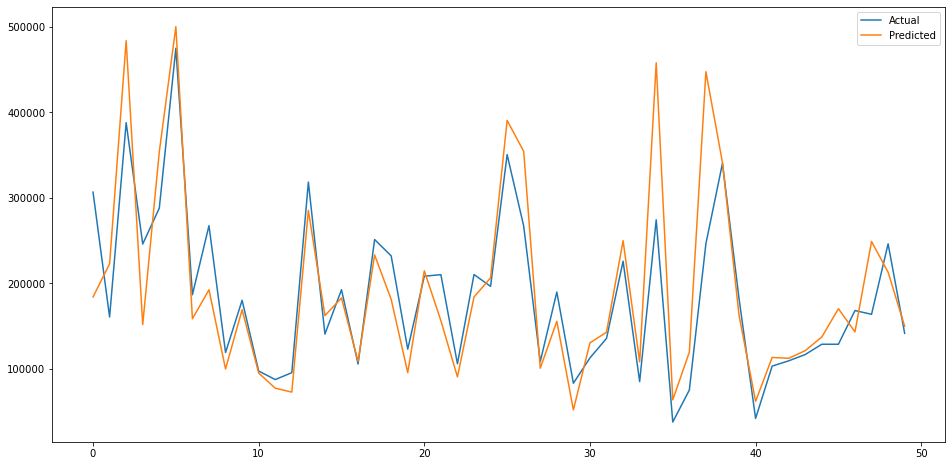

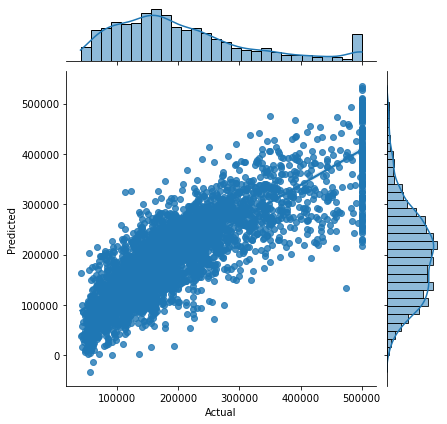

In [113]:
import seaborn as sns
test = pd.DataFrame({'Predicted':strat_Y_pred,'Actual':strat_test_Y})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# Additional Work: Random forest Regression

In [114]:
from sklearn.ensemble import RandomForestRegressor

rfReg = RandomForestRegressor(30)
rfReg.fit(strat_stand_train_X, strat_train_Y)

RandomForestRegressor(n_estimators=30)

In [115]:
rfReg_Y_pred = rfReg.predict(strat_stand_test_X)
print("The first five Predictions are:\n", rfReg_Y_pred[:5])
print("\nAnd the corresponding Target values are:\n", strat_test_Y[:5])

The first five Predictions are:
 [311393.36666667 136850.         480767.4        219653.4
 405690.2       ]

And the corresponding Target values are:
 16718    184200
5663     222800
17054    483700
29       151900
11497    353800
Name: median_house_value, dtype: int64


In [116]:
#getting a little overview by how many percent the predictions are off from the actual values
Target3 = list(strat_test_Y)
off3 = 1 - (rfReg_Y_pred/list(strat_test_Y))
off3 *= 100

print("Displaying how the first 10 predictions are offset as compared to Target value:\n")
#for i in range(len(list(Y_test))):
for i in range(11):
    print("Target ", i, " is ", Target[i], " and prediction is", rfReg_Y_pred[i], ", off by", -off3[i], "%")
    
print("\n\nOverall, the values are off by an average", abs(off3).mean(), "%")

Displaying how the first 10 predictions are offset as compared to Target value:

Target  0  is  184200  and prediction is 311393.36666666664 , off by 69.05177343467244 %
Target  1  is  222800  and prediction is 136850.0 , off by -38.577199281867145 %
Target  2  is  483700  and prediction is 480767.4 , off by -0.6062848873268467 %
Target  3  is  151900  and prediction is 219653.4 , off by 44.60394996708361 %
Target  4  is  353800  and prediction is 405690.2 , off by 14.666534765404183 %
Target  5  is  500001  and prediction is 480124.06666666665 , off by -3.975378715909239 %
Target  6  is  158700  and prediction is 150953.33333333334 , off by -4.881327452215912 %
Target  7  is  192600  and prediction is 198766.66666666666 , off by 3.201799930771898 %
Target  8  is  100000  and prediction is 96410.0 , off by -3.5900000000000043 %
Target  9  is  169300  and prediction is 201253.33333333334 , off by 18.873794053947623 %
Target  10  is  95300  and prediction is 101193.33333333333 , off by 6

In [117]:
rmse_strat_test3 = np.sqrt(mean_squared_error(strat_test_Y, rfReg_Y_pred))
r2_strat_test3 = r2_score(strat_test_Y, rfReg_Y_pred)

print('Root Mean Squared Error for test model:', rmse_strat_test3)
print('R-squared for test model:', r2_strat_test3)

Root Mean Squared Error for test model: 54482.759042540776
R-squared for test model: 0.7551419877640736


Above results clearly show that 

- there is significant improvement in accuracy of the model with RANDOM FOREST REGRESSION as compared to linear regression
- A RMSE and R-squared value of 54290 and 0.7568 respectively shows that this is a very good model

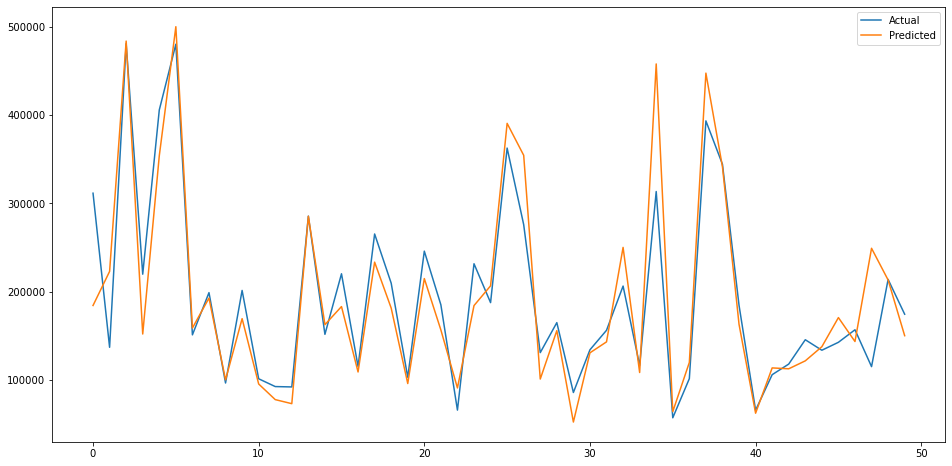

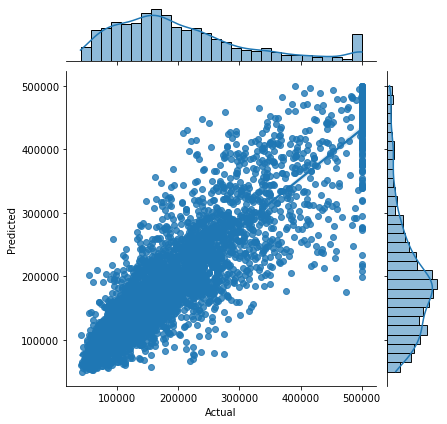

In [118]:
test = pd.DataFrame({'Predicted':rfReg_Y_pred,'Actual':strat_test_Y})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# Comparison of different Regression models: Linear, Ridge, Random forest and  Gradient Boosting Regression

In [125]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [126]:
# Define the models
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100)
}

In [127]:
# Train and evaluate each model
for name, regressor in regressors.items():
    print(f'Training {name}')
    # Fit the model
    regressor.fit(strat_stand_train_X, strat_train_Y)
    # Make predictions
    y_pred = regressor.predict(strat_stand_test_X)
    # Evaluate the model
    mse = mean_squared_error(strat_test_Y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(strat_test_Y, y_pred)
    print(f'{name}:\nRMSE: {rmse:.2f}\nR^2 score: {r2:.2f}\n')

Training Linear Regression
Linear Regression:
RMSE: 60485.79
R^2 score: 0.70

Training Ridge Regression
Ridge Regression:
RMSE: 60482.67
R^2 score: 0.70

Training Random Forest Regression
Random Forest Regression:
RMSE: 53949.07
R^2 score: 0.76

Training Gradient Boosting Regression
Gradient Boosting Regression:
RMSE: 54219.11
R^2 score: 0.76



From above comparison, it is clear that Random Forest Regression is the best regression method to create this model

# Linear regression with one independent variable - median_income

In [119]:
strat_train_X1 = strat_train_X.drop(["totalrooms_per_hhold","sparerooms_per_hhold", "pop_per_hhold",
                               "ocean_proximity",'housing_median_age',], axis=1)
strat_train_X1

,median_income
14123,5.0653
9366,2.5562
5482,2.7236
11316,2.8621
12134,6.6689
...,...
5452,2.5833
3561,3.3724
18868,8.4375
9915,2.9821


In [120]:
strat_test_X1 = strat_test_X.drop(["totalrooms_per_hhold","sparerooms_per_hhold", "pop_per_hhold",
                               "ocean_proximity",'housing_median_age',], axis=1)

In [121]:
#Applying linear regression
linReg.fit(strat_train_X1, strat_train_Y)

#Printing the linear regression intercepts and coefficients
print("Linear regression intercept:" +str(linReg.intercept_))
print("Linear regression coefficent:" +str(linReg.coef_))

Linear regression intercept:20179.97250516503
Linear regression coefficent:[47340.17728986]


In [122]:
#Prediction
Y_pred = linReg.predict(strat_test_X1)
print("The first five Predictions are:\n", Y_pred[:5])
print("\nAnd the corresponding Target values are:\n", strat_test_Y[:5])

The first five Predictions are:
 [262395.98960873 215685.43667682 371396.74781863 233314.91869957
 228476.75258054]

And the corresponding Target values are:
 16718    184200
5663     222800
17054    483700
29       151900
11497    353800
Name: median_house_value, dtype: int64


In [123]:
rmse_strat_test4 = np.sqrt(mean_squared_error(strat_test_Y, Y_pred))
r2_strat_test4 = r2_score(strat_test_Y, Y_pred)

print('Root Mean Squared Error for test model:', rmse_strat_test4)
print('R-squared for test model:', r2_strat_test4)

Root Mean Squared Error for test model: 72105.77992484861
R-squared for test model: 0.5711195082805509


Above results show that our earlier regression models are much better as compared to this model with just imput attribute median_income

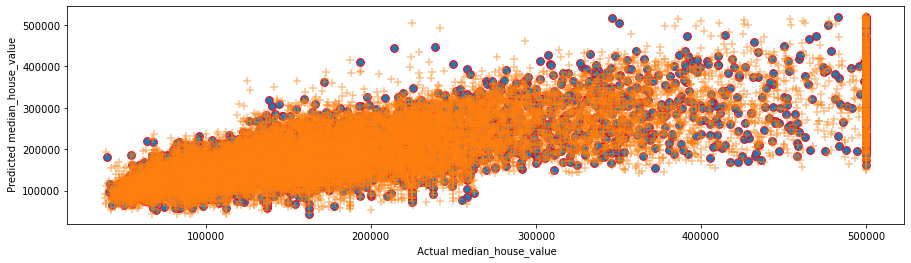

In [124]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib nbagg
%matplotlib inline
mpl.get_backend()
fig = plt.figure(figsize=(15,4))
plt.scatter(strat_test_Y ,Y_pred,marker="o",edgecolors ="r",s=60)
plt.scatter(strat_train_Y, linReg.predict(strat_train_X1),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")
plt.show()

Above figure clearly shows that the the predicted test results (blue circles) are in line with the trained model predicted results

# Summary

Following steps taken to carry out project:

STEP1: Loading the given data and Treating the Nan values with the median value 
- There were 207 Nans in the collumn Bedrooms which were imputed with the median value

STEP2: Drawing the facts from available data using the graphical visualization
- From Graphical visualization we concluded that majority of the population happens to be along the ocean's coast which is followed by the middle part (Inland) of the California state
- We also concluded that close to the ocean's cost (i.e. <1H OCEAN), median housing value tend to be higher and vice-a-versa

STEP3: Data Transformation
- Here we had first found the correlation between the different attributes
- We created three new attributes from the existing attributes:
  i) totalrooms_per_hhold = total_rooms/households
  ii) sparerooms_per_hhold = (total_rooms-total_bedrooms)/households
  iii) pop_per_hhold = population/households
- We removed the attributes sparerooms, total_rooms, households, population and total_bedrooms as we have new attributes derieved from them
- We also dropped the attributes lattitude and longitude as we donot have idea about the cities derieved from them and we like to reduce the non-linearity incurring from these attributes in out linear regression model

STEP4: Splitting the Transformed data randomly into Train and Test set and Performing Linear regression
- Here we did the random split using train_test_split from sklearn.model_selection

STEP5: Standardizing data - Encoding the Categorical attribute "Oceans proximity" and Scaling the numerical attributes using the Column Transformer
- For encoding we used OneHotEncoder from sklearn.preprocessing
- For Scaling we used StandardScaler from sklearn.preprocessing
- Before encoding we found the there were only five "ISLAND" values in Oceans proximity columns and so becuase of its extremely small percentage we deemed this value as outlier and deleted these five outliers
- We used pipeline (from sklearn.pipeline) with columntransformer (sklearn.compose) to carry out the encoding and scaling operation of Train and Test test together

STEP6: Training the model and Predicting the results using Linear Regression
- We trained the data using linear regression and predicted the results from the Trained model
- We got the Root Mean Squared Error and R-squared value of 72035 and 0.61 repectively which were not sattisfactorily figures

STEP7: Improving the model performance: searching and removing Outliers
- We distributed each of the given attributes into different number of bins to find the range and percentage of outliers for each attributes and removed them
- Data is trimmed to 99 percentile for attributes median_income, totalrooms_per_hhold, pop_per_hhold and sparerooms_per_hhold in order to remove the tail outliers
- Assuming median_income direcly proportional to median house value, totalrooms_per_hhold and sparerooms_per_hhold, we looked for the unrealistic/unlikely combination of input and target variables because such combination results in lower model accuracy
- We found 32 different unrealistic/unlikely combination of input and target variables that can affect the model accuracy and with these combinations we removed 2278 rows/outliers in the data which is appx. 5% of the total data
- Result after removing outliers: the correlation coefficient of 
  i) median_income w.r.t median_house value is increased from 0.689 to 0.747
  ii) sparerooms_per_hhold w.r.t median_house value is increased from 0.191 to 0.470
  iii) totalrooms_per_hhold w.r.t median_house value is increased from 0.152 to 0.461
  iv) housing_median_age w.r.t median_house value is slightly decreased from 0.105 to 0.076
  v) pop_per_hhold w.r.t median_house value is decreased from -0.024 to -0.257
- Above results show that the unrealistic/unlikely combination of input and target variables which we chosen has really helped to improve the oveall correlation of input attribute with the target attribute

STEP8: Improving the model performance: Stratified splitting of Train and Test set to avoid sampling bias
- we used StratifiedShuffleSplit from sklearn.model_selection for splitting into train and Test data
- StratifiedShuffleSplit was carried out on the basis of Income category
- we created a new column called "Income_cat" based on the following income band:
  - Income between 1-1.5 is named as Category-1
  - Income between 1.5-3.0 is named as Category-2
  - Income between 3-4.5 is named as Category-3
  - Income between 4.5-6.0 is named as Category-4
  - Income above 6 is named as Category-5
- StratifiedShuffleSplit ensures the data is split equally from each income category to avoid the sampling bias between Train and Test data
- After StratifiedShuffleSplit, the column "Income_cat" is deleted

STEP9: Standardizing the data and performing Linear regression
- we again used OneHotEncoder and StandardScaler from sklearn.preprocessing for encoding the categorical column and scaling the numnerical columns of input attributes
- Linear regression is performed to train the data and then the train model is used to predict the test data
- Result from Linear regression: 
  - Root Mean Squared Error for test model is now improved from 72035 to 60485
  - R-squared for test model is now improved from 0.610 to 0.698
- There is a significant improvement in the accuracy of model with the removal of outliers and then stratified splitting the Train and Test data

STEP10: Comparison of different Regression models- Linear, Ridge, Random forest and Gradient Boosting Regression
- We carried out all the four regressions (Linear, Ridge, Random forest and Gradient Boosting Regression) in one operation to compare the results from them
- The results from linear and Ridge regression fetched almost same results:
  1) Linear Regression result:
     RMSE: 60485.79
     R^2 score: 0.70
  2) Ridge Regression result:
     RMSE: 60482.67
     R^2 score: 0.70
- The results from Random Forest and Gradient Boosting regression fetched almost same results abd are far better than Linear regression results:
1) Random Forest Regression
   RMSE: 53949.07
   R^2 score: 0.76
2) Gradient Boosting Regression:
   RMSE: 54219.11
   R^2 score: 0.76
- The above results show that Random Forest Regression is the best regression model with RMSE of 53949.07 and R-squared value of 0.76

STEP11: Linear regression with one independent variable - median_income
- Result from this regression:
  - Root Mean Squared Error for test model: 72106
  - R-squared for test model: 0.571
- Conclusion: Linear regression with one independent variable median_income is proved to be bad model than our model with the transformed and standardised model with stratified splitting between Train and Test set. The difference in performance parameters is huge
- It is to be noted that this model does not include parameters like longitude and lattitude. Also this model doesnot include the "ISLAND" value in the categorical column "oceans proximity". These are the limitations of this model